In [2]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
poly = '/Volumes/MARI/ssdl_gps/rnx_polynomial/gps_poly_2019008_G21.npz'

# Load the saved NPZ file to verify the data
loaded_data = np.load(poly)
loaded_time_strings = loaded_data['time_strings']
loaded_poly_values = loaded_data['poly_values']


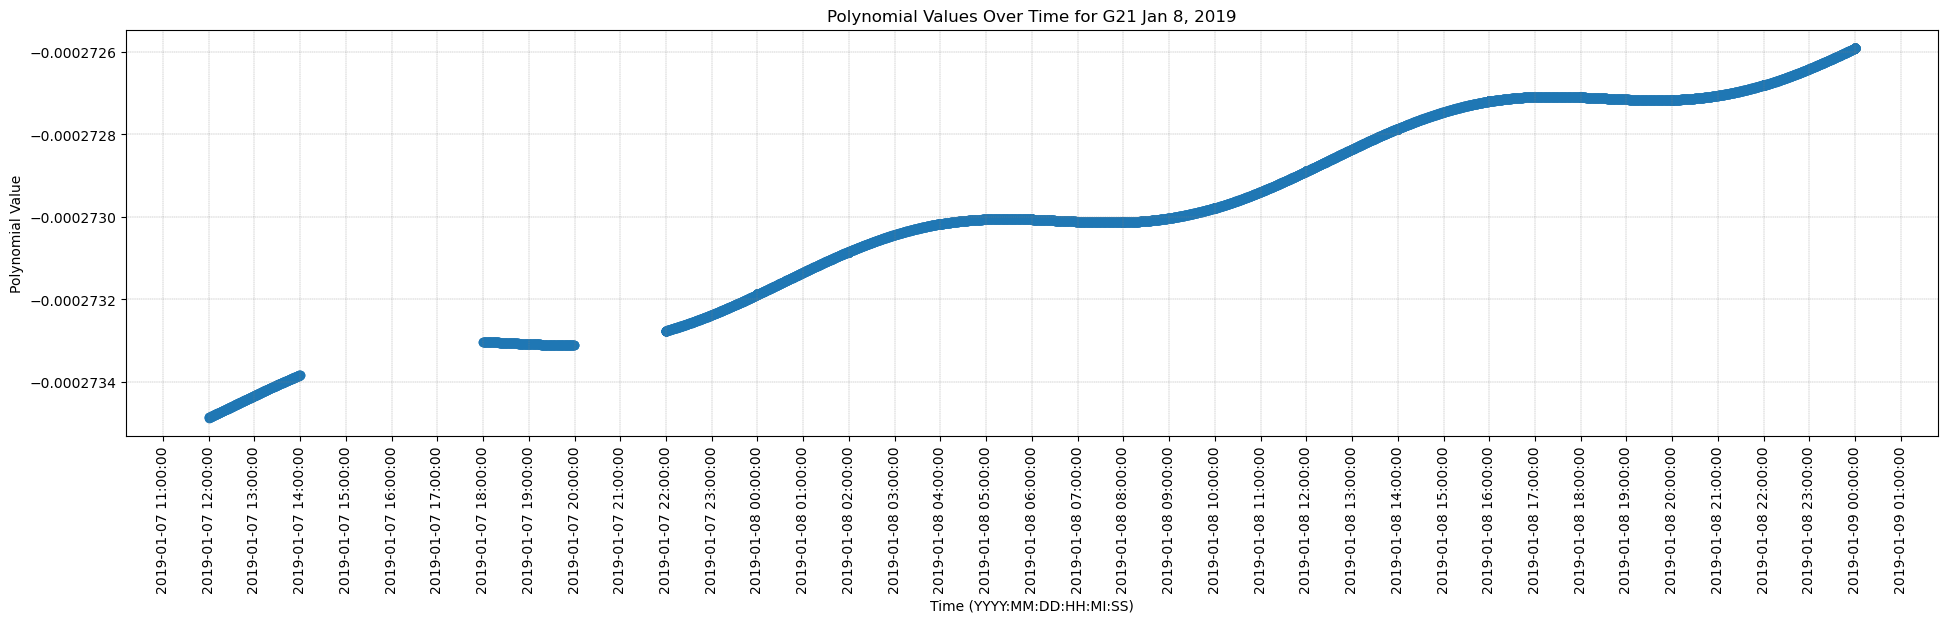

CPU times: user 542 ms, sys: 11.6 ms, total: 553 ms
Wall time: 223 ms


In [4]:
%%time

# Convert time strings to datetime objects
# cumu_time_datetimes = [datetime.strptime(cumu_ts, '%Y:%m:%d:%H:%M:%S') for cumu_ts in cumu_time_strings]
time_datetimes = [datetime.strptime(ts, '%Y:%m:%d:%H:%M:%S') for ts in loaded_time_strings]

# Plot the results
plt.figure(figsize=(20, 5))
# plt.scatter(cumu_time_datetimes, cumu_poly_values)
plt.scatter(time_datetimes, loaded_poly_values)
plt.xlabel('Time (YYYY:MM:DD:HH:MI:SS)')
plt.ylabel('Polynomial Value')
# plt.ylim(-0.0002734, -0.0002722)

plt.title('Polynomial Values Over Time for G21 Jan 8, 2019')

# # Format the x-axis to show dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks every hour

plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=0.25)
plt.xticks(rotation=90)
plt.show()

In [15]:
data = np.load('/Volumes/MARI/ssdl_gps/correction_data_2019.npz')
data.files

['matching_epochs',
 'matching_clock_bias',
 'matching_poly_values',
 'correction_vals']

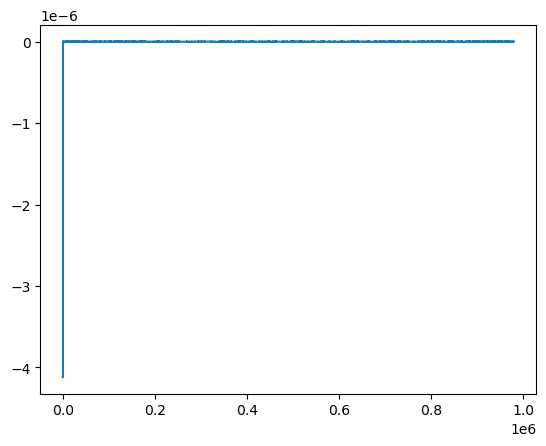

In [31]:
plt.plot(data['correction_vals'])